In [34]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


#import environment

In [2]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/qgea-i56i.csv')
#import dataframe

In [3]:
df
#check dataframe

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
0,10600119,2002-01-01T00:00:00.000,11:00:00,2006-02-25T00:00:00.000,11:00:00,NaN,2006-03-06T00:00:00.000,104,RAPE,157.0,...,M,NaN,NaN,NaN,NaN,(null),(null),18-24,WHITE,F
1,11052575,2005-04-22T00:00:00.000,02:00:00,NaN,(null),NaN,2006-04-22T00:00:00.000,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,M
2,10832306,2005-07-11T00:00:00.000,20:00:00,2006-03-29T00:00:00.000,12:00:00,NaN,2006-03-29T00:00:00.000,353,UNAUTHORIZED USE OF A VEHICLE,462.0,...,M,NaN,NaN,NaN,NaN,(null),(null),45-64,WHITE,M
3,10107192,2005-10-19T00:00:00.000,20:30:00,NaN,(null),NaN,2006-01-13T00:00:00.000,126,MISCELLANEOUS PENAL LAW,461.0,...,F,NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,F
4,23893731,2005-12-04T00:00:00.000,09:00:00,2006-08-09T00:00:00.000,17:00:00,NaN,2006-08-09T00:00:00.000,109,GRAND LARCENY,405.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,WHITE,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28601067,2002-10-01T00:00:00.000,00:00:00,2007-04-20T00:00:00.000,20:00:00,77.0,2007-04-20T00:00:00.000,109,GRAND LARCENY,438.0,...,(null),NaN,40.674496,-73.930571,"(40.6744956865259, -73.9305713255961)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,M
996,64716118,1995-09-01T00:00:00.000,00:00:00,2000-03-01T00:00:00.000,00:00:00,83.0,2009-08-12T00:00:00.000,116,SEX CRIMES,179.0,...,M,NaN,40.698474,-73.917769,"(40.6984738177025, -73.917768981221)",PATROL BORO BKLYN NORTH,(null),18-24,WHITE HISPANIC,F
997,140224707,2002-05-05T00:00:00.000,03:30:00,2009-05-21T00:00:00.000,11:15:00,5.0,2014-12-17T00:00:00.000,112,THEFT-FRAUD,739.0,...,(null),NaN,40.716012,-73.997332,"(40.7160120119955, -73.9973320301008)",PATROL BORO MAN SOUTH,(null),25-44,BLACK,M
998,10307299,2005-06-12T00:00:00.000,10:00:00,2005-06-12T00:00:00.000,12:00:00,67.0,2006-02-05T00:00:00.000,112,THEFT-FRAUD,739.0,...,(null),NaN,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,F


In [4]:
df.columns
#check all the column names

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')

In [5]:
dff = pd.read_csv('https://raw.githubusercontent.com/AlbertUoU/data/main/1.csv')
#import all the explanation of all the columns names

In [6]:
dff
#check

,Column Name,Description,Type,Unnamed: 3
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...,Plain Text,NaN
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...,Date & Time,NaN
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...,Plain Text,NaN
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...,Date & Time,NaN
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...,Plain Text,NaN
5,ADDR_PCT_CD,The precinct in which the incident occurred,Number,NaN
6,RPT_DT,Date event was reported to police,Date & Time,NaN
7,KY_CD,Three digit offense classification code,Number,NaN
8,OFNS_DESC,Description of offense corresponding with key ...,Plain Text,NaN
9,PD_CD,Three digit internal classification code (more...,Number,NaN


In [7]:
new_column_names = dff.iloc[:, 1].tolist()


df.columns = new_column_names









In [8]:
df

,Randomly generated persistent ID for each complaint,"Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)","Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)","Ending date of occurrence for the reported event, if exact time of occurrence is unknown","Ending time of occurrence for the reported event, if exact time of occurrence is unknown",The precinct in which the incident occurred,Date event was reported to police,Three digit offense classification code,Description of offense corresponding with key code,Three digit internal classification code (more granular than Key Code),...,Suspect?s Sex Description,Transit district in which the offense occurred.,"Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)","Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)",Geospatial Location Point (latitude and Longitude combined),The name of the patrol borough in which the incident occurred,Transit station name,Victim?s Age Group,Victim?s Race Description,Victim?s Sex Description
0,10600119,2002-01-01T00:00:00.000,11:00:00,2006-02-25T00:00:00.000,11:00:00,NaN,2006-03-06T00:00:00.000,104,RAPE,157.0,...,M,NaN,NaN,NaN,NaN,(null),(null),18-24,WHITE,F
1,11052575,2005-04-22T00:00:00.000,02:00:00,NaN,(null),NaN,2006-04-22T00:00:00.000,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,M
2,10832306,2005-07-11T00:00:00.000,20:00:00,2006-03-29T00:00:00.000,12:00:00,NaN,2006-03-29T00:00:00.000,353,UNAUTHORIZED USE OF A VEHICLE,462.0,...,M,NaN,NaN,NaN,NaN,(null),(null),45-64,WHITE,M
3,10107192,2005-10-19T00:00:00.000,20:30:00,NaN,(null),NaN,2006-01-13T00:00:00.000,126,MISCELLANEOUS PENAL LAW,461.0,...,F,NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,F
4,23893731,2005-12-04T00:00:00.000,09:00:00,2006-08-09T00:00:00.000,17:00:00,NaN,2006-08-09T00:00:00.000,109,GRAND LARCENY,405.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,WHITE,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28601067,2002-10-01T00:00:00.000,00:00:00,2007-04-20T00:00:00.000,20:00:00,77.0,2007-04-20T00:00:00.000,109,GRAND LARCENY,438.0,...,(null),NaN,40.674496,-73.930571,"(40.6744956865259, -73.9305713255961)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,M
996,64716118,1995-09-01T00:00:00.000,00:00:00,2000-03-01T00:00:00.000,00:00:00,83.0,2009-08-12T00:00:00.000,116,SEX CRIMES,179.0,...,M,NaN,40.698474,-73.917769,"(40.6984738177025, -73.917768981221)",PATROL BORO BKLYN NORTH,(null),18-24,WHITE HISPANIC,F
997,140224707,2002-05-05T00:00:00.000,03:30:00,2009-05-21T00:00:00.000,11:15:00,5.0,2014-12-17T00:00:00.000,112,THEFT-FRAUD,739.0,...,(null),NaN,40.716012,-73.997332,"(40.7160120119955, -73.9973320301008)",PATROL BORO MAN SOUTH,(null),25-44,BLACK,M
998,10307299,2005-06-12T00:00:00.000,10:00:00,2005-06-12T00:00:00.000,12:00:00,67.0,2006-02-05T00:00:00.000,112,THEFT-FRAUD,739.0,...,(null),NaN,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,F


In [20]:
df.columns

Index(['Randomly generated persistent ID for each complaint',
       'Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)',
       'Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)',
       'Ending date of occurrence for the reported event, if exact time of occurrence is unknown',
       'Ending time of occurrence for the reported event, if exact time of occurrence is unknown',
       'The precinct in which the incident occurred',
       'Date event was reported to police',
       'Three digit offense classification code',
       'Description of offense corresponding with key code',
       'Three digit internal classification code (more granular than Key Code)',
       'Description of internal classification corresponding with PD code (more granular than Offense Description)',
       'Indicator of whether crime was successfully completed or attempted, but failed or was interrupt

In [9]:
dff['Description'].unique()
#check

array(['Randomly generated persistent ID for each complaint',
       'Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)',
       'Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)',
       'Ending date of occurrence for the reported event, if exact time of occurrence is unknown',
       'Ending time of occurrence for the reported event, if exact time of occurrence is unknown',
       'The precinct in which the incident occurred',
       'Date event was reported to police',
       'Three digit offense classification code',
       'Description of offense corresponding with key code',
       'Three digit internal classification code (more granular than Key Code)',
       'Description of internal classification corresponding with PD code (more granular than Offense Description)',
       'Indicator of whether crime was successfully completed or attempted, but failed or was interrupt

In [10]:
dff['Column Name'].unique()
dff['Column Name'].count()

35

In [11]:
df.shape

(1000, 35)

In [12]:
column_ranges = [(0, 9), (12, 18), (24, 26), (30, 32)]

subset_dfs = []
for start, end in column_ranges:
    subset_dfs.append(df.iloc[:, start:end+1])

df1 = pd.concat(subset_dfs, axis=1)

df1

,Randomly generated persistent ID for each complaint,"Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)","Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)","Ending date of occurrence for the reported event, if exact time of occurrence is unknown","Ending time of occurrence for the reported event, if exact time of occurrence is unknown",The precinct in which the incident occurred,Date event was reported to police,Three digit offense classification code,Description of offense corresponding with key code,Three digit internal classification code (more granular than Key Code),...,"Specific description of premises; grocery store, residence, street, etc.",Description of the jurisdiction code,"Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.","Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)",Suspect?s Race Description,Suspect?s Sex Description,Transit district in which the offense occurred.,The name of the patrol borough in which the incident occurred,Transit station name,Victim?s Age Group
0,10600119,2002-01-01T00:00:00.000,11:00:00,2006-02-25T00:00:00.000,11:00:00,NaN,2006-03-06T00:00:00.000,104,RAPE,157.0,...,(null),N.Y. POLICE DEPT,0,(null),WHITE,M,NaN,(null),(null),18-24
1,11052575,2005-04-22T00:00:00.000,02:00:00,NaN,(null),NaN,2006-04-22T00:00:00.000,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,(null),N.Y. POLICE DEPT,0,(null),(null),(null),NaN,(null),(null),25-44
2,10832306,2005-07-11T00:00:00.000,20:00:00,2006-03-29T00:00:00.000,12:00:00,NaN,2006-03-29T00:00:00.000,353,UNAUTHORIZED USE OF A VEHICLE,462.0,...,(null),N.Y. POLICE DEPT,0,(null),WHITE,M,NaN,(null),(null),45-64
3,10107192,2005-10-19T00:00:00.000,20:30:00,NaN,(null),NaN,2006-01-13T00:00:00.000,126,MISCELLANEOUS PENAL LAW,461.0,...,(null),N.Y. POLICE DEPT,0,(null),BLACK,F,NaN,(null),(null),25-44
4,23893731,2005-12-04T00:00:00.000,09:00:00,2006-08-09T00:00:00.000,17:00:00,NaN,2006-08-09T00:00:00.000,109,GRAND LARCENY,405.0,...,(null),N.Y. POLICE DEPT,0,(null),(null),(null),NaN,(null),(null),25-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28601067,2002-10-01T00:00:00.000,00:00:00,2007-04-20T00:00:00.000,20:00:00,77.0,2007-04-20T00:00:00.000,109,GRAND LARCENY,438.0,...,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),NaN,PATROL BORO BKLYN NORTH,(null),25-44
996,64716118,1995-09-01T00:00:00.000,00:00:00,2000-03-01T00:00:00.000,00:00:00,83.0,2009-08-12T00:00:00.000,116,SEX CRIMES,179.0,...,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),WHITE HISPANIC,M,NaN,PATROL BORO BKLYN NORTH,(null),18-24
997,140224707,2002-05-05T00:00:00.000,03:30:00,2009-05-21T00:00:00.000,11:15:00,5.0,2014-12-17T00:00:00.000,112,THEFT-FRAUD,739.0,...,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),NaN,PATROL BORO MAN SOUTH,(null),25-44
998,10307299,2005-06-12T00:00:00.000,10:00:00,2005-06-12T00:00:00.000,12:00:00,67.0,2006-02-05T00:00:00.000,112,THEFT-FRAUD,739.0,...,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),NaN,PATROL BORO BKLYN SOUTH,(null),25-44


In [13]:
df1

,Randomly generated persistent ID for each complaint,"Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)","Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)","Ending date of occurrence for the reported event, if exact time of occurrence is unknown","Ending time of occurrence for the reported event, if exact time of occurrence is unknown",The precinct in which the incident occurred,Date event was reported to police,Three digit offense classification code,Description of offense corresponding with key code,Three digit internal classification code (more granular than Key Code),...,"Specific description of premises; grocery store, residence, street, etc.",Description of the jurisdiction code,"Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.","Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)",Suspect?s Race Description,Suspect?s Sex Description,Transit district in which the offense occurred.,The name of the patrol borough in which the incident occurred,Transit station name,Victim?s Age Group
0,10600119,2002-01-01T00:00:00.000,11:00:00,2006-02-25T00:00:00.000,11:00:00,NaN,2006-03-06T00:00:00.000,104,RAPE,157.0,...,(null),N.Y. POLICE DEPT,0,(null),WHITE,M,NaN,(null),(null),18-24
1,11052575,2005-04-22T00:00:00.000,02:00:00,NaN,(null),NaN,2006-04-22T00:00:00.000,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,(null),N.Y. POLICE DEPT,0,(null),(null),(null),NaN,(null),(null),25-44
2,10832306,2005-07-11T00:00:00.000,20:00:00,2006-03-29T00:00:00.000,12:00:00,NaN,2006-03-29T00:00:00.000,353,UNAUTHORIZED USE OF A VEHICLE,462.0,...,(null),N.Y. POLICE DEPT,0,(null),WHITE,M,NaN,(null),(null),45-64
3,10107192,2005-10-19T00:00:00.000,20:30:00,NaN,(null),NaN,2006-01-13T00:00:00.000,126,MISCELLANEOUS PENAL LAW,461.0,...,(null),N.Y. POLICE DEPT,0,(null),BLACK,F,NaN,(null),(null),25-44
4,23893731,2005-12-04T00:00:00.000,09:00:00,2006-08-09T00:00:00.000,17:00:00,NaN,2006-08-09T00:00:00.000,109,GRAND LARCENY,405.0,...,(null),N.Y. POLICE DEPT,0,(null),(null),(null),NaN,(null),(null),25-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28601067,2002-10-01T00:00:00.000,00:00:00,2007-04-20T00:00:00.000,20:00:00,77.0,2007-04-20T00:00:00.000,109,GRAND LARCENY,438.0,...,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),NaN,PATROL BORO BKLYN NORTH,(null),25-44
996,64716118,1995-09-01T00:00:00.000,00:00:00,2000-03-01T00:00:00.000,00:00:00,83.0,2009-08-12T00:00:00.000,116,SEX CRIMES,179.0,...,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),WHITE HISPANIC,M,NaN,PATROL BORO BKLYN NORTH,(null),18-24
997,140224707,2002-05-05T00:00:00.000,03:30:00,2009-05-21T00:00:00.000,11:15:00,5.0,2014-12-17T00:00:00.000,112,THEFT-FRAUD,739.0,...,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),NaN,PATROL BORO MAN SOUTH,(null),25-44
998,10307299,2005-06-12T00:00:00.000,10:00:00,2005-06-12T00:00:00.000,12:00:00,67.0,2006-02-05T00:00:00.000,112,THEFT-FRAUD,739.0,...,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),NaN,PATROL BORO BKLYN SOUTH,(null),25-44


In [14]:
for column in df.columns:
    value_counts = df[column].value_counts()
    most_common = value_counts.idxmax()
    most_common_count = value_counts.max()
    print(f"Most common value in '{column}': {most_common} (Count: {most_common_count})")

    # most showing up data in each column

    #common value in 'Suspect?s Age Group': (null) (Count: 740)
    #Most common value in 'Suspect?s Race Description': (null) (Count: 531)
    #Most common value in 'Suspect?s Sex Description': (null) (Count: 592)
    #I wish everyone can be safe because this mean police fail to get the criminal character for the most of the time, so it mean the crime would happen fast or on purpose with face covered

Most common value in 'Randomly generated persistent ID for each complaint': 10600119 (Count: 1)
Most common value in 'Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)': 2005-01-01T00:00:00.000 (Count: 31)
Most common value in 'Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)': 00:01:00 (Count: 190)
Most common value in 'Ending date of occurrence for the reported event, if exact time of occurrence is unknown': 2005-12-31T00:00:00.000 (Count: 9)
Most common value in 'Ending time of occurrence for the reported event, if exact time of occurrence is unknown': (null) (Count: 286)
Most common value in 'The precinct in which the incident occurred': 47.0 (Count: 36)
Most common value in 'Date event was reported to police': 2006-03-29T00:00:00.000 (Count: 8)
Most common value in 'Three digit offense classification code': 109 (Count: 221)
Most common value in 'Description of offense cor

In [15]:
for column in df.columns:
    non_null_values = df[column].dropna()  # Drop null values from the column
    value_counts = non_null_values.value_counts()

    if not value_counts.empty:
        most_common = value_counts.idxmax()
        most_common_count = value_counts.max()
        print(f"Most common value in '{column}': {most_common} (Count: {most_common_count})")
    else:
        print(f"No non-null values in '{column}'")

Most common value in 'Randomly generated persistent ID for each complaint': 10600119 (Count: 1)
Most common value in 'Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)': 2005-01-01T00:00:00.000 (Count: 31)
Most common value in 'Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)': 00:01:00 (Count: 190)
Most common value in 'Ending date of occurrence for the reported event, if exact time of occurrence is unknown': 2005-12-31T00:00:00.000 (Count: 9)
Most common value in 'Ending time of occurrence for the reported event, if exact time of occurrence is unknown': (null) (Count: 286)
Most common value in 'The precinct in which the incident occurred': 47.0 (Count: 36)
Most common value in 'Date event was reported to police': 2006-03-29T00:00:00.000 (Count: 8)
Most common value in 'Three digit offense classification code': 109 (Count: 221)
Most common value in 'Description of offense cor

 I fail to drop the null value when I do the counting part

---



In [16]:
for column in df1.columns:
    value_counts = df1[column].value_counts()

    # Exclude null values from the count
    if None in value_counts.index:
        value_counts = value_counts.drop(index=None)

    if not value_counts.empty:
        least_common = value_counts.idxmin()
        least_common_count = value_counts.min()
        print(f"Least common value in '{column}': {least_common} (Count: {least_common_count})")
    else:
        print(f"No non-null values in '{column}'")

        # found the most successful crime because it is least reported

Least common value in 'Randomly generated persistent ID for each complaint': 10600119 (Count: 1)
Least common value in 'Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)': 2005-04-19T00:00:00.000 (Count: 1)
Least common value in 'Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)': 10:20:00 (Count: 1)
Least common value in 'Ending date of occurrence for the reported event, if exact time of occurrence is unknown': 2001-04-01T00:00:00.000 (Count: 1)
Least common value in 'Ending time of occurrence for the reported event, if exact time of occurrence is unknown': 13:13:00 (Count: 1)
Least common value in 'The precinct in which the incident occurred': 10.0 (Count: 1)
Least common value in 'Date event was reported to police': 2006-05-15T00:00:00.000 (Count: 1)
Least common value in 'Three digit offense classification code': 348 (Count: 1)
Least common value in 'Description of offense 

In [30]:
df2 = df[['Suspect?s Race Description','Three digit offense classification code','Victim?s Race Description']]


In [33]:
df2.describe

<bound method NDFrame.describe of     Suspect?s Race Description  Three digit offense classification code  \
0                        WHITE                                      104   
1                       (null)                                      110   
2                        WHITE                                      353   
3                        BLACK                                      126   
4                       (null)                                      109   
..                         ...                                      ...   
995                     (null)                                      109   
996             WHITE HISPANIC                                      116   
997                     (null)                                      112   
998                     (null)                                      112   
999                     (null)                                      126   

    Victim?s Race Description  
0                       WHITE  
1

In [35]:
df2_sum_length_by_race.plot(x='Suspect?s Race Description', y='Victim?s Race Description', kind='bar', color='purple')
plt.xlabel('Race')
plt.ylabel('v age')
plt.title('Relationship between sus and v')


TypeError: ignored

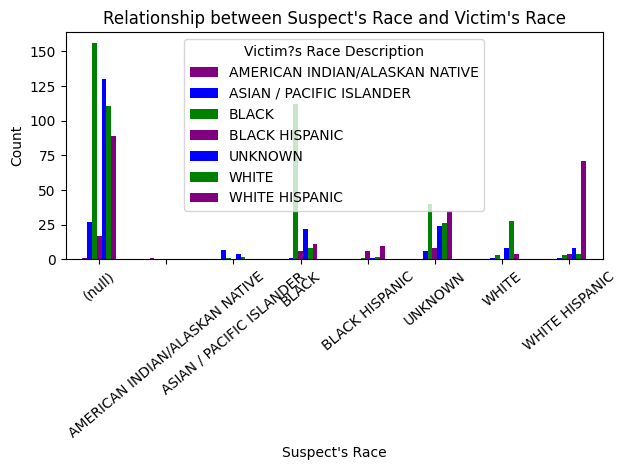

In [43]:
counts = df2_sum_length_by_race.groupby(['Suspect?s Race Description', 'Victim?s Race Description']).size().unstack()

# Plot the counts as a bar chart
counts.plot(kind='bar', color=['purple', 'blue', 'green'])
plt.xlabel("Suspect's Race")
plt.ylabel('Count')
plt.title('Relationship between Suspect\'s Race and Victim\'s Race')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()